<a href="https://colab.research.google.com/github/Wishmiii/Colombo-Travel-Route-Optimizer/blob/main/MathCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp # For symbolic mathematics
import numpy as np # For numeric mathematics
import matplotlib.pyplot as plt # For plotting
import cv2
from numpy.fft import fftshift, fftfreq, fft, fft2


#Q 1 - Modelling Travel Time

Let:
- x =total route distance (in km)
- y =traffic delay factor (in minutes per km)

The travel time for each mode of transport is modelled as:



The function for Bus travel time:


$$
T_b(x,y) = ax^2 +by^2
$$


The function for Taxi travel time:
$$
T_t(x,y) = \sqrt{c(x^2+y^2)}
$$

where:
- a reflects the effect of distance on bus travel time (stops, boarding times).
- b reflects the effect of congestion on bus travel time.
1
- c is a proportionality constant converting combined effects into minutes for taxis.

##Part a - Gradient Calculation for each mode

In [ ]:
sp.init_printing()

#Define variables
x,y = sp.symbols('x y',real=True)
a,b,c = sp.symbols('a b c',positive=True)

#------------------------Bus Travel Time Model-------------------

#Bus travel time function
T_b = a*x**2 + b*y**2

#Computing partial differetiation
T_b_x = sp.diff(T_b, x)
T_b_y = sp.diff(T_b, y)

# Gradient for Bus Travel Time
gradient_T_bus = sp.Matrix([T_b_x, T_b_y])
print("Gradient of Bus Travel Time Model = \n")
sp.pprint(gradient_T_bus)


#------------------------Taxi Travel Time Model-------------------

#Taxi travel time function
T_t = sp.sqrt(c*(x**2 + y**2))

#Computing partial differetiation
T_t_x = sp.diff(T_t, x)
T_t_y = sp.diff(T_t, y)

# Gradient for Taxi Travel Time
gradient_T_taxi = sp.Matrix([T_t_x, T_t_y])
print("\n\nGradient of Bus Travel Time Model = \n")
sp.pprint(gradient_T_taxi)




Gradient of Bus Travel Time Model = 

⎡2⋅a⋅x⎤
⎢     ⎥
⎣2⋅b⋅y⎦


Gradient of Bus Travel Time Model = 

⎡    √c⋅x    ⎤
⎢────────────⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎢╲╱  x  + y  ⎥
⎢            ⎥
⎢    √c⋅y    ⎥
⎢────────────⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎣╲╱  x  + y  ⎦


Bus Travel Time Modal:

Gradient:
$$
\nabla T(x,y) = (2ax,2by)
$$

<br>

Taxi Travel Time Modal:

Gradient:


\begin{aligned}
\nabla T(x,y)
&= \left(
  \frac{\sqrt c\,x}{\sqrt{x^2+y^2}}, \frac{\sqrt c\,y}{\sqrt{x^2+y^2}}
  \right)\\
&= \left(
  \frac{c\,x}{\sqrt{c(x^2+y^2)}}, \frac{c\,y}{\sqrt{c(x^2+y^2)}}
  \right)
\end{aligned}



##Part b - Interpretation


Gradient components reveal how travel time changes with respect to distance (x) and congestion (y).

#Bus Travel Time Gradient


$$
\nabla T(x,y) = (2ax,2by)
$$


 - 2ax - effect of distance
 - 2by - effect of congestion

According to gradient, distance and congestion affect bus travel time independently. Factor with stronger impact is decide by both,

- coefficients a and b
- values of x and y

Meaning, if distance and congestion are similar,
- when a > b, distance dominates
- when b > a, congestion dominates

Therefore, the strongest factor is decided by the combined effect of the given variable's magnitude and coeffient.


<br>
<br>

#Taxi Travel Time Gradient


$$
\nabla T(x,y) = \left(
  \frac{cx}{\sqrt{c(x^2+y^2)}}, \frac{cy}{\sqrt{c(x^2+y^2)}}
  \right)
$$

Both gradient components share the same denominator indicating that distance and congestion contribute symmetrically. Therefore, the taxi time is not dominated by one variable indipendently. Instead, travel time depends on overall combined effect of both distance and congestion.

#Q 2 - Cost Analysis Using Integration

Fare Rate Functions ( cost per km)


Bus:

$$
F_b(x) = ∫_0^x (2t+1) dt
$$


Taxi:

$$
F_t(x) = ∫_0^x (3t+2) dt
$$

where:



*   t  =  distance travelled (km)
*   integrand = incremental cost per km







##Part a Integral Calculation

In [ ]:
#Define variables
t = sp.symbols('t',real=True, nonnegative=True)

#------------------------Bus Travel Time Model-------------------

#Bus fare rate function
F_b = 2*t + 1

#Integrating
tot_fare_bus = sp.integrate(F_b, (t,0,x))

print("Bus Fare =\n")
sp.pprint(tot_fare_bus)

#------------------------Taxi Travel Time Model-------------------

#Taxi fare rate function
F_t = 3*t + 2

#Integrating
tot_fare_taxi = sp.integrate(F_t, (t,0,x))

print("\n\nTaxi Fare =")
sp.pprint(tot_fare_taxi)



Bus Fare =

 2    
x  + x


Taxi Fare =
   2      
3⋅x       
──── + 2⋅x
 2        


Part a - Answers

$$
Bus Fare = x^2 + x
$$

$$
Taxi Fare = 3x^2 + 2x
$$

##Part b - Plotting each fare against distance (0-5km)

In [ ]:
#Converting symbolic SymPy expression into a NumPy compatible numeric function
tot_fair_bus = sp.lambdify(x, tot_fare_bus, 'numpy')
tot_fair_taxi = sp.lambdify(x, tot_fare_taxi, 'numpy')

# Setting distance range
distance =np.linspace(0,5,100)


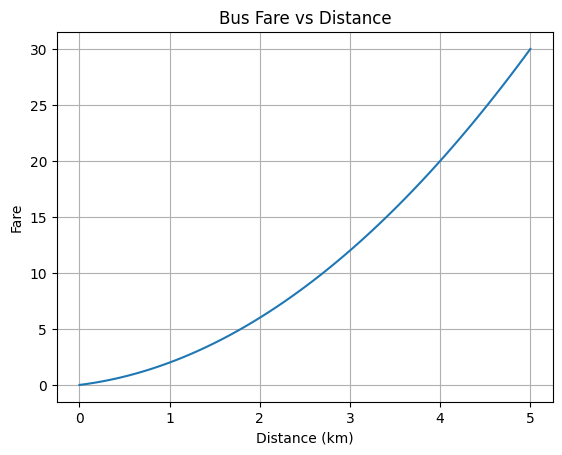

In [ ]:
#plot
plt.figure()
plt.plot(distance, tot_fair_bus(distance))
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Bus Fare vs Distance')
plt.grid(True)
plt.show()

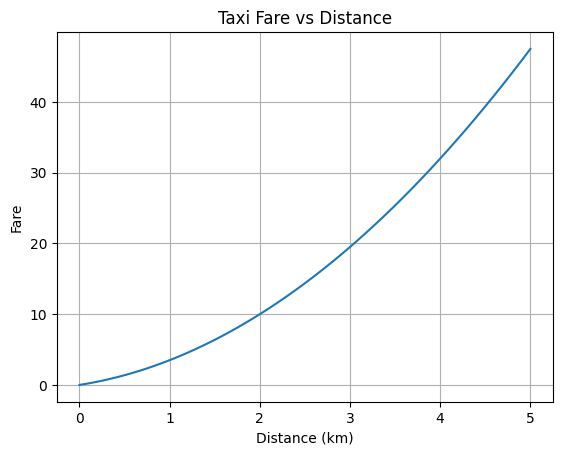

In [ ]:
#plot
plt.figure()
plt.plot(distance, tot_fair_taxi(distance))
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Taxi Fare vs Distance')
plt.grid(True)
plt.show()

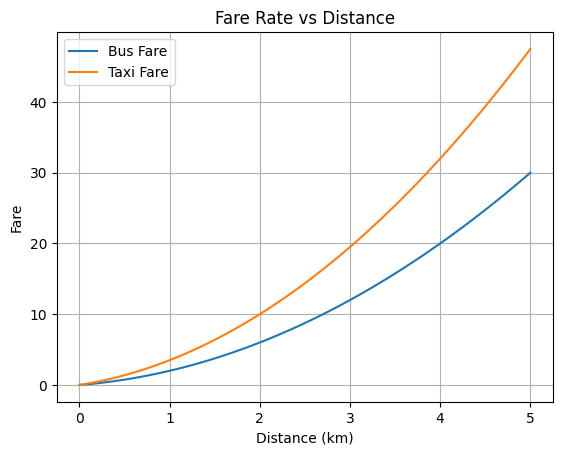

In [ ]:
plt.figure()
plt.plot(distance, tot_fair_bus(distance),label='Bus Fare')
plt.plot(distance, tot_fair_taxi(distance),label='Taxi Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Fare Rate vs Distance')
plt.legend()
plt.grid(True)
plt.show()


##Part c - Interpretation

Both fare functions contain  quadratic terms indicating an accelerating increase in the cost which is reflected by upward curve plots.

The taxi plot shows a steeper curve due to it's larger quadratic coefficient and linear term compared to bus fare function, resulting in a widening gap between bus and taxi fare curves as distance increases.

This positive and increasing difference is confirmed by,
$$
F_t(x) - F_b(x) = \frac {1}{2}x^2 + x
$$


Longer the journey becomes, the more expensive taxi gets compared to bus.

In conclution, buses remain the most affordable option for any distance.  However, when speed, comfort and convenience is prioritised taxi can be suitable for shorter distance journeys given the smaller extra cost.



#Q 3 - Predicting Peak Travel Times Using Series Convergence

Passanger volume p(t) is modelled by:
$$
P(t) = 5 + 4\sin(\pi t) - \frac {3}{2} t^2 + \frac {t^4}{4} + ..., t \in [0,24]
$$

##Part a - Approximation of P(t) using first 4 terms for t_hrs ∈ [0,24]



Terms:

$$
P_t =  5 + 4 \sin(\pi t) - \frac {3}{2} t^2 + \frac {t^4}{4}
$$




In [ ]:
#Setting time range
t_hrs=np.linspace(0,24,1000)

In [ ]:
# Approximating first 4 terms of the passanger volume function
P_t = 5 + (4*np.sin(np.pi * t_hrs))- ((3/2)*t_hrs**2)+((t_hrs**4/4))

##Part b

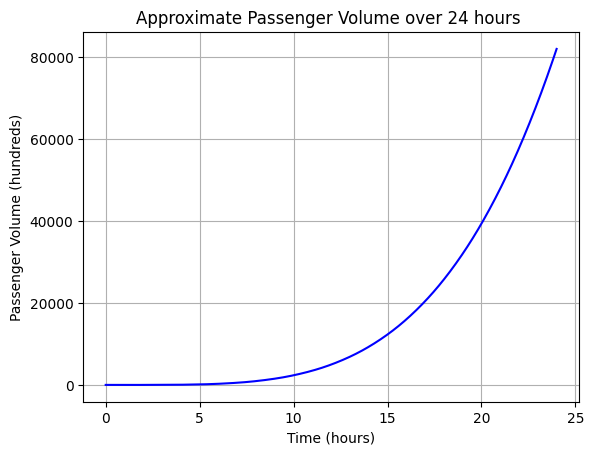

In [ ]:
# Plotting passenger volume over 24 hours
plt.figure()
plt.plot(t_hrs,P_t, color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume (hundreds)')
plt.title('Approximate Passenger Volume over 24 hours ')
plt.grid(True)
plt.show()

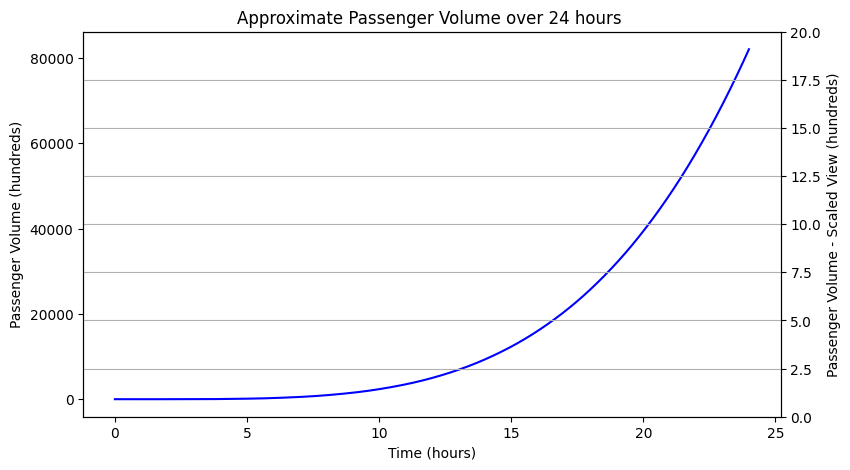

In [ ]:
# Adding a scaled y axis to reveal the early hour passanger volume behaviour, which is hidden due to rapid growth later in the day
fig, ax1 = plt.subplots(figsize=(9,5))

ax1.plot(t_hrs, P_t, color='blue')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Passenger Volume (hundreds)')
ax1.set_title('Approximate Passenger Volume over 24 hours ')

ax2 = ax1.twinx()
ax2.set_ylabel('Passenger Volume - Scaled View (hundreds)')
ax2.set_ylim(0,20)

plt.grid(True)
plt.show()


##Part c

##Peak Identification

In [ ]:
#Computing derivative
dt = np.gradient(P_t, t_hrs)

#Identify sign changes from + to -
peaks = np.where((dt[:-1] > 0)& (dt[1:] < 0))[0]

print("Peaks Found:")
if len(peaks)==0:
  print("No peaks found")
else:
  for i in peaks:
    print(f"  - Peak at time {t_hrs[i]:.2f} hours = {P_t[i]:.2f}")

Peaks Found:
  - Peak at time 0.46 hours = 8.66


The peak identification,identifies a single peak at approximately 0.46 hours with a passanger volume of 8.66 hundreds.

This peak appears in the initial part of the plot where the sinusoidal term in the series still affects the passenger volume and introduces oscillations. However, as time increases the series is dominated by the higher-order polynomial term $(t^4)$ causing a rapid and monotonous growth in passenger volume with no fluctuations.


This indicates truncated  approximation is only effective for a short time range and highlights limitations of truncating a series that contains a higher order polynomial term .


